##LSTM
LSTMs are a type of Recurrent Neural Network (RNN) that excel at **capturing long-term dependencies** in sequential data. They address the problem of vanishing and exploding gradients encountered in traditional RNNs by incorporating gates that regulate the flow of information.

### Core Concepts

1. **Memory Cell**: Holds information across time steps.
2. **Gates**: Control how information flows:
  * **Forget Gate**: Decides what information to forget.
  * **Input Gate**: Decides what new information to store.
  * **Output Gate**: Decides what information to output.

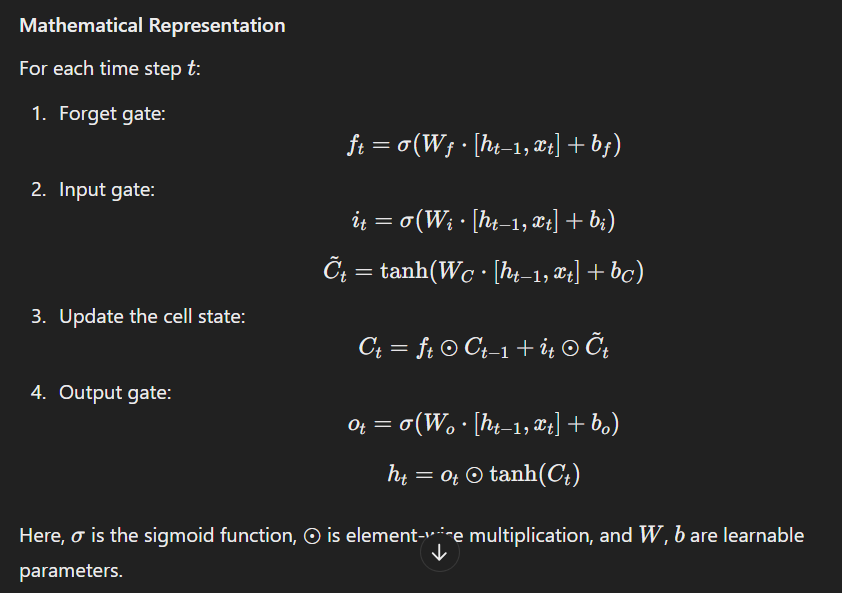

LSTM with PyTorch-

In [1]:
import torch
import torch.nn as nn

In [2]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # LSTM forward pass
        out, _ = self.lstm(x, (h0, c0))

        # Pass through the fully connected layer (only take last time step)
        out = self.fc(out[:, -1, :])
        return out

In [3]:
# Parameters
input_size = 10    # Number of features
hidden_size = 20   # Number of hidden units
output_size = 1    # Regression output
sequence_length = 5
batch_size = 16

In [4]:
# Initialize the model, loss, and optimizer
model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [5]:
# Dummy data
x = torch.randn(batch_size, sequence_length, input_size) #input
y = torch.randn(batch_size, output_size)

In [6]:
# Training step
output = model(x)
loss = criterion(output, y)
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("Training step completed. Loss:", loss.item())

Training step completed. Loss: 1.518990397453308


### Explanation of the Code

1. LSTM Layer:
  * nn.LSTM handles the sequential nature of the input.
2. Hidden and Cell States:
  * Initialized as zero tensors at the start of each sequence.
3. Fully Connected Layer:
  * Converts the hidden state at the last time step to the desired output size.
4. Dummy Data:
  * Random tensors simulate input and output for demonstration purposes.

This basic setup can be extended for tasks like time-series forecasting, text generation, or sequence classification.

Suppose we are working with time-series data:

  * If you're forecasting stock prices:

      1. batch_size: Number of different stock sequences (e.g., prices of 16 stocks).
      2. sequence_length: Number of past days you consider (e.g., 5 days).
      3. input_size: Features per day (e.g., [opening price, closing price, volume] → 3 features).
      4. x is the input. Accorting to this code above, x is a tensor of random values with shape (16, 5, 10).
    

## How Input Flows Through the LSTM

1. Time Steps (Sequence):
  * The LSTM processes the data one time step at a time. For a single sequence, x[:, t, :] represents the features at the t-th time step.

2. Features (Input Size):
  * At each time step, the LSTM receives a vector of size input_size. For example, if input_size=10, there are 10 features per time step.

3. Batching:
  * The LSTM processes multiple sequences simultaneously (batching). In this case, the model processes 16 sequences (one for each batch entry).

Input example-
if,
* batch_size = 2       # Two sequences in parallel
* sequence_length = 4  # Four time steps per sequence
* input_size = 3       # Three features per time step

Then x could look like-
* x = torch.tensor([
    [[1.0, 0.5, 2.0], [1.1, 0.4, 2.1], [1.2, 0.3, 2.2], [1.3, 0.2, 2.3]],
    [[0.9, 0.7, 1.8], [1.0, 0.6, 1.9], [1.1, 0.5, 2.0], [1.2, 0.4, 2.1]]
])
* Shape: (2, 4, 3)

Here:
1. Sequence 1 has values [[1.0, 0.5, 2.0], ...] for its 4 time steps.
2. Sequence 2 has values [[0.9, 0.7, 1.8], ...] for its 4 time steps.

## Output of the LSTM

The LSTM processes the sequences and returns:

  1. Output Tensor:
      *  A 3D tensor of shape (batch_size, sequence_length, hidden_size) containing hidden states for each time step.
  2. Final Hidden State:
      * Used in this example to predict the output.